<a href="https://colab.research.google.com/github/MashKeyZ/handwrite-digits-classifier/blob/main/digits_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


import mnist data from keras

In [4]:
data = keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = data.load_data()

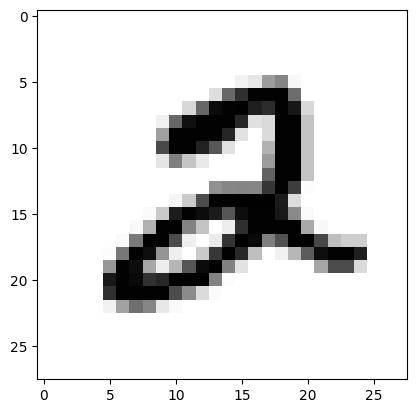

2

In [6]:
plt.imshow(x_train[5],cmap=plt.cm.binary)
plt.show()
y_train[5]

In [7]:
#Shrink the values to be between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

Define the network

In [11]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(150,activation="relu"),
        keras.layers.Dense(10,activation="softmax") #for multi-class classification
    ]
)

In [12]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [13]:
EPOCHS = 10
model.fit(x_train,y_train,epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2490 - accuracy: 0.9294
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1072 - accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0548 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0410 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0324 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0260 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.014

Test the accuracy with new data

In [14]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test accuracy : ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.9789
Test accuracy :  0.9789000153541565


display predictions

313/313 [==============================] - 1s 2ms/step


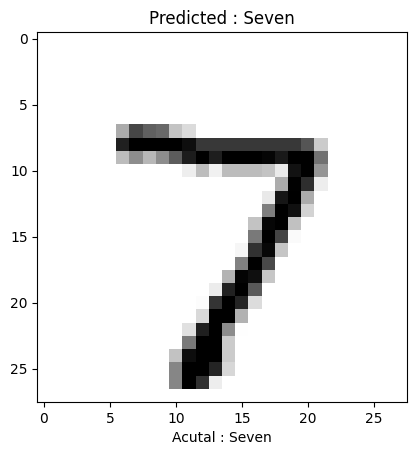

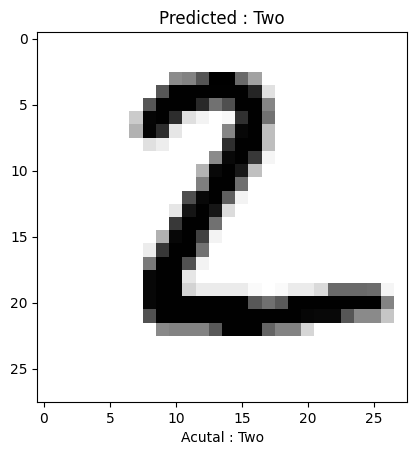

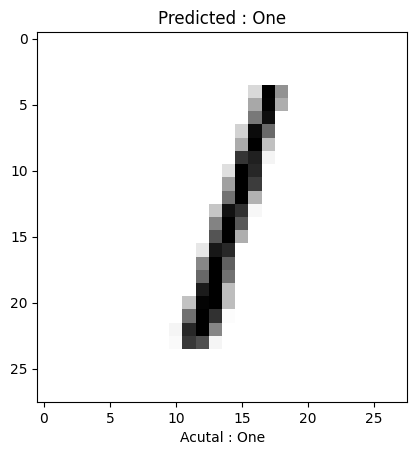

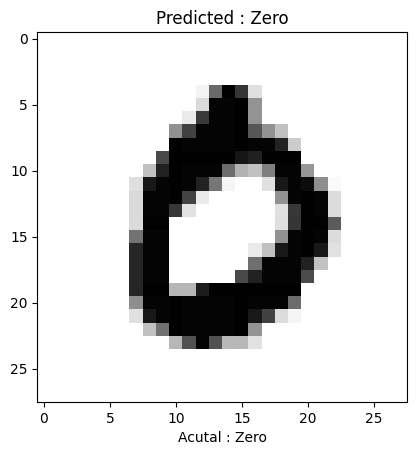

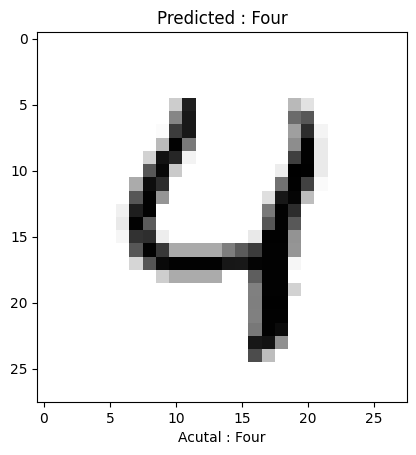

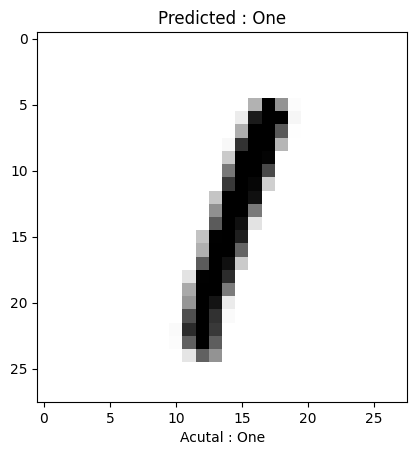

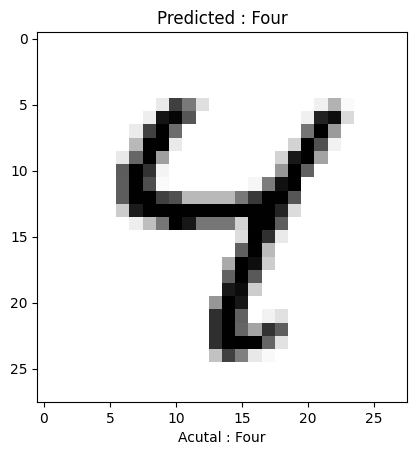

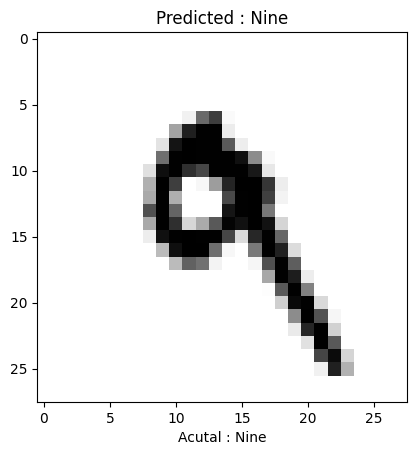

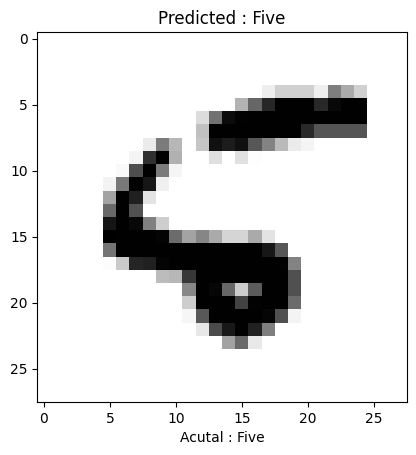

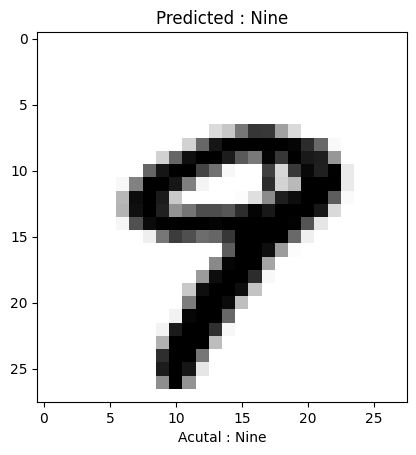

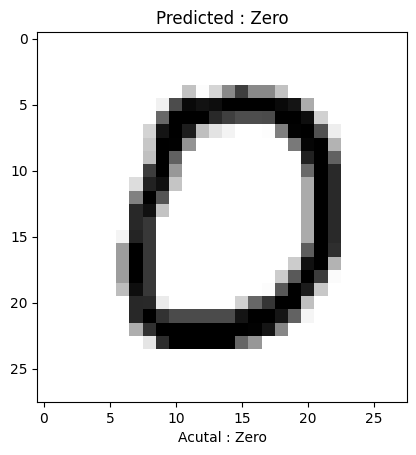

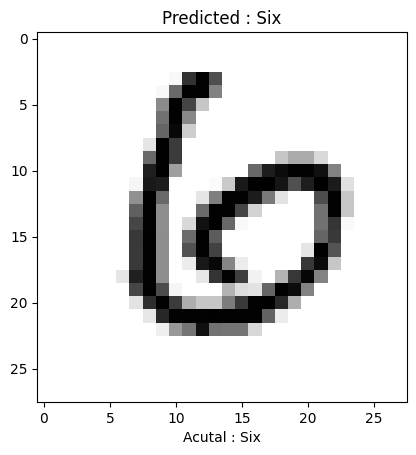

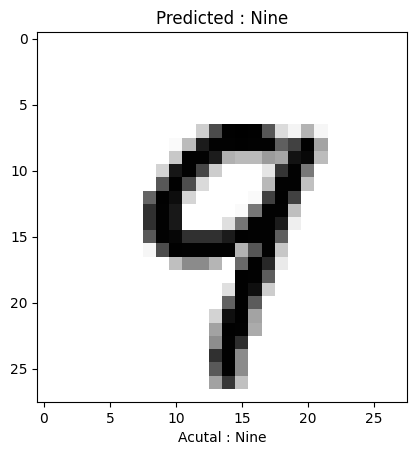

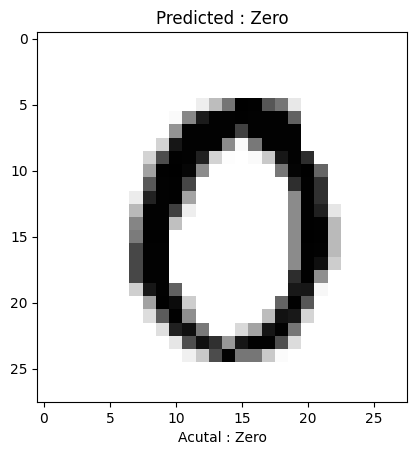

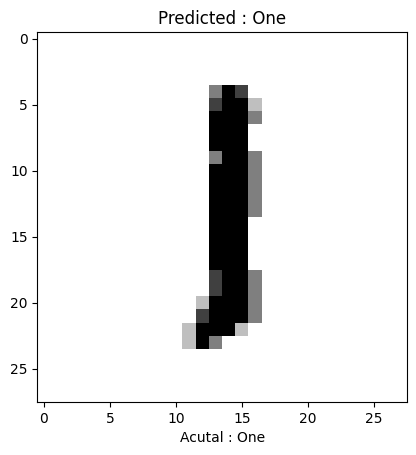

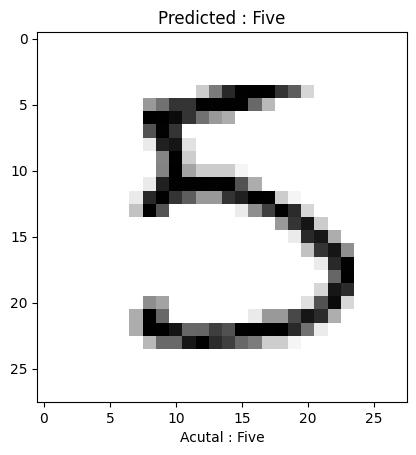

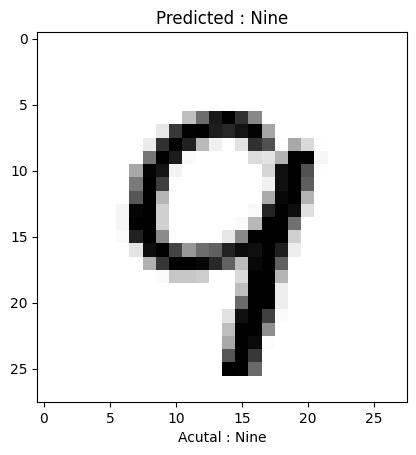

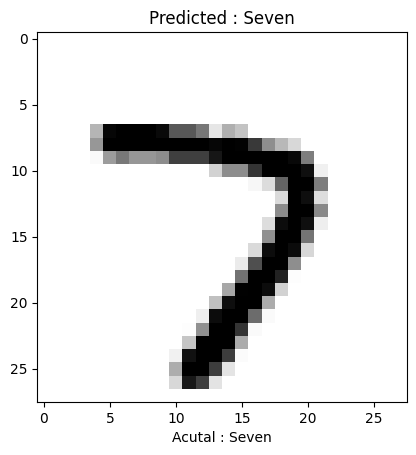

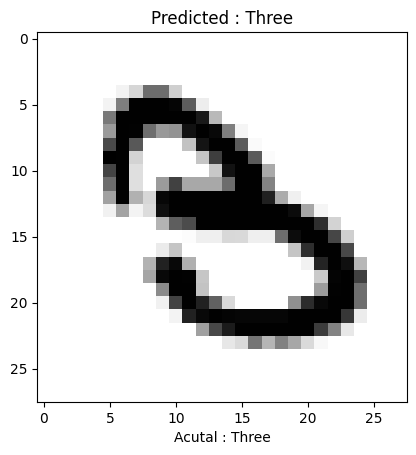

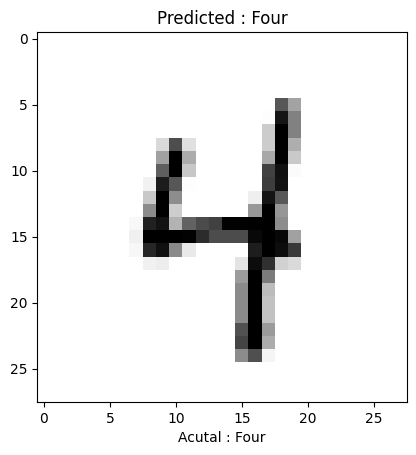

In [22]:
predictions = model.predict(x_test)
digits = ["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]

for i in range(20):
  plt.grid(False)
  plt.imshow(x_test[i],cmap=plt.cm.binary)
  pindex = np.argmax(predictions[i])
  aindex = y_test[i]
  plt.xlabel("Acutal : "+digits[aindex])
  plt.title("Predicted : "+digits[pindex])
  plt.show()
